#One Hundred Years of US Baby Names

Bootcamp Project
June 30, 2020

Group
Dhara Bhansali
Sarah Grant
Keke Li
Matt Debnar

Overview


In [38]:
# Dependencies
#from config import (census_key, gkey)
import gmaps
import numpy as np
import pandas as pd
import requests
import time
#from us import states
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [39]:
#data source: https://www.kaggle.com/kaggle/us-baby-names
#import baby name data
baby_name_original = pd.read_csv(
    "Data/StateNames.csv", dtype="object", encoding="utf-8")
#display result
baby_name_original.head()

,Id,Name,Year,Gender,State,Count
0,1,Mary,1910,F,AK,14
1,2,Annie,1910,F,AK,12
2,3,Anna,1910,F,AK,10
3,4,Margaret,1910,F,AK,8
4,5,Helen,1910,F,AK,7


In [40]:
#clean up column formats for Count (float), Year (int), convert year to date in new column date_conv (datetime)
baby_name_original["Count"] = baby_name_original.Count.astype(float)
baby_name_original["Year"] = baby_name_original["Year"].astype(int)
#alternative: change year into datetime if desired as new column date_conv
#baby_name_original['date_conv'] = pd.to_datetime(baby_name_original.Year)

In [41]:
#look for null values
baby_name_original.isnull().sum()

Id        0
Name      0
Year      0
Gender    0
State     0
Count     0
dtype: int64

In [42]:
#add a new column for Decade
baby_name_new = baby_name_original.copy()
baby_name_new.set_index('Id', inplace=True)
#baby_name_new["Year"] = baby_name_new["Year"].astype(int)
baby_name_new['Decade'] = ((baby_name_new['Year']//10)*10)
#baby_name_new = baby_name_new.reset_index(drop=True)
baby_name_new

,Name,Year,Gender,State,Count,Decade
Id,,,,,,
1,Mary,1910,F,AK,14.0,1910
2,Annie,1910,F,AK,12.0,1910
3,Anna,1910,F,AK,10.0,1910
4,Margaret,1910,F,AK,8.0,1910
5,Helen,1910,F,AK,7.0,1910
...,...,...,...,...,...,...
1048571,Kyrsten,2002,F,FL,6.0,2000
1048572,Lacy,2002,F,FL,6.0,2000
1048573,Laurie,2002,F,FL,6.0,2000


In [43]:
#Define Region by State values
Northeast = ('CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA')
Midwest = ('IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD')
South = ('DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'AR', 'OK', 'TX')
West = ('AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA')


In [44]:
#add column Region and assign based on region-state values
baby_name_new["Region"] = np.where(baby_name_new["State"].isin(Northeast), "Northeast", 
         (np.where(baby_name_new["State"].isin(South), "South",
            (np.where(baby_name_new["State"].isin(West), "West",
                (np.where(baby_name_new["State"].isin(Midwest), "Midwest", "Unknown")))))))

#confirm 4 regions across all data
baby_name_new.nunique()

Name      20652
Year        105
Gender        2
State        10
Count      3313
Decade       11
Region        3
dtype: int64

In [45]:
#find any Unkown regions to bug fix Region States
baby_unknown = baby_name_new.loc[baby_name_new["Region"] == "Unknown", :]
baby_unknown

,Name,Year,Gender,State,Count,Decade,Region
Id,,,,,,,


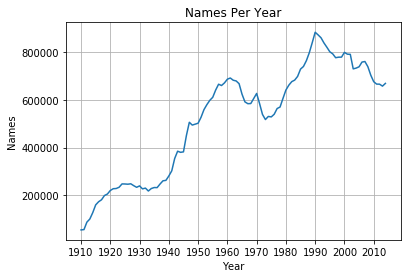

<Figure size 1080x720 with 0 Axes>

In [46]:
#summarize names per year
years = list(range(1910, 2011, 10))
plt.plot(baby_name_original.groupby(['Year']).agg({'Count':np.sum}))
plt.title("Names Per Year")
plt.xlabel('Year')
plt.ylabel('Names')
plt.xticks(years)
plt.grid()
plt.figure(figsize=(15,10))
plt.savefig(f'Output/Names Per Year.png')

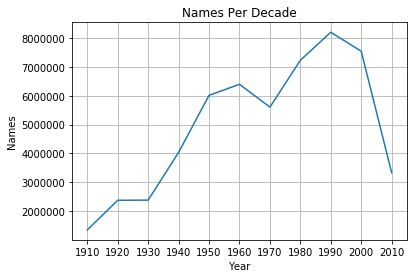

<Figure size 1080x720 with 0 Axes>

In [47]:
#optional names by Decade
years = list(range(1910, 2011, 10))
plt.plot(baby_name_new.groupby(['Decade']).agg({'Count':np.sum}))
plt.title("Names Per Decade")
plt.xlabel('Year')
plt.ylabel('Names')
plt.xticks(years)
plt.grid()
plt.figure(figsize=(15,10))
plt.savefig(f'Output/Names Per Decade.png')

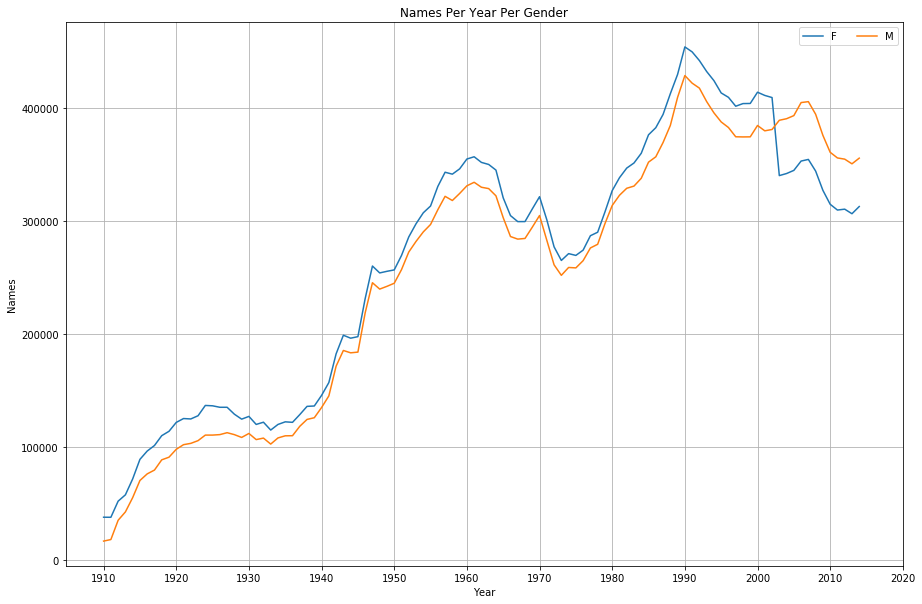

In [48]:
GenderNameGB = baby_name_new.groupby(['Year', 'Gender'])['Count'].sum()
GenderNameGBDF = pd.DataFrame(GenderNameGB)
GenderNameGBDF
GenderNameGBDF.rename(index={0: "Year", 1: "Gender", 2: "Count"})
GenderNameGBDFX = GenderNameGBDF.unstack()
GenderNameGBDFX.columns = GenderNameGBDFX.columns.droplevel()
GenderNameGBDFX
multi_plot = GenderNameGBDFX.plot(kind="line", figsize=(15, 10))
multi_plot.set_title("Names Per Year Per Gender")
multi_plot.set_xlabel('Year')
multi_plot.set_ylabel('Names')
multi_plot.legend(ncol=2)
years = list(range(1910, 2021, 10))
plt.xticks(years)
plt.grid()
plt.savefig(f'Output/Names Per Gender.png')

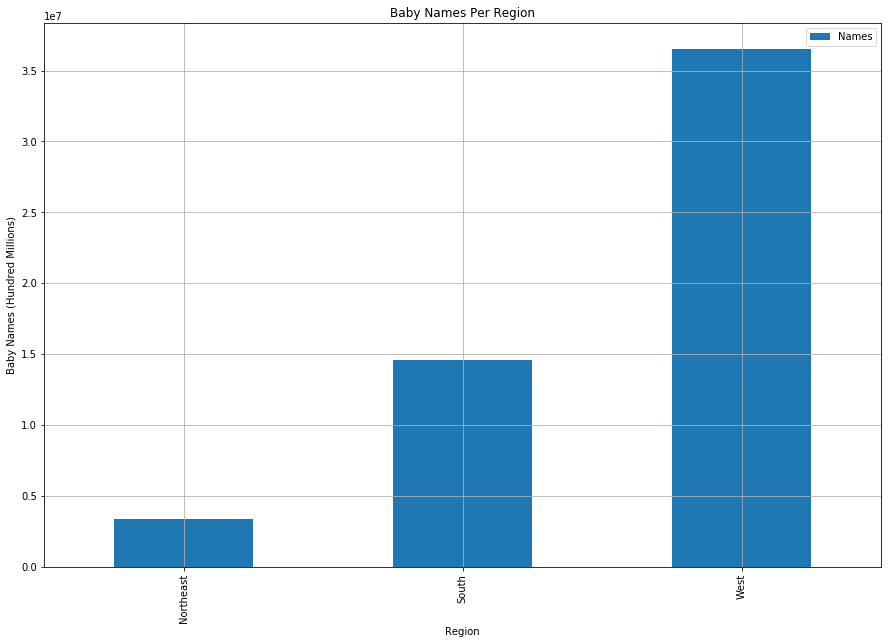

In [49]:
babyRegion = baby_name_new.groupby("Region")

Region = babyRegion.count().index
RegionNames = babyRegion['Count'].sum()

regionSummary = pd.DataFrame({"Region": Region, "Names": RegionNames,
                             })
regionSummary.set_index('Region', inplace=True)

multi_plot = regionSummary.plot(kind="bar", figsize=(15, 10))
plt.title(f"Baby Names Per Region")
plt.grid()
plt.xlabel("Region")
plt.ylabel("Baby Names (Hundred Millions)")
plt.savefig(f'Output/Names Per Region.png')

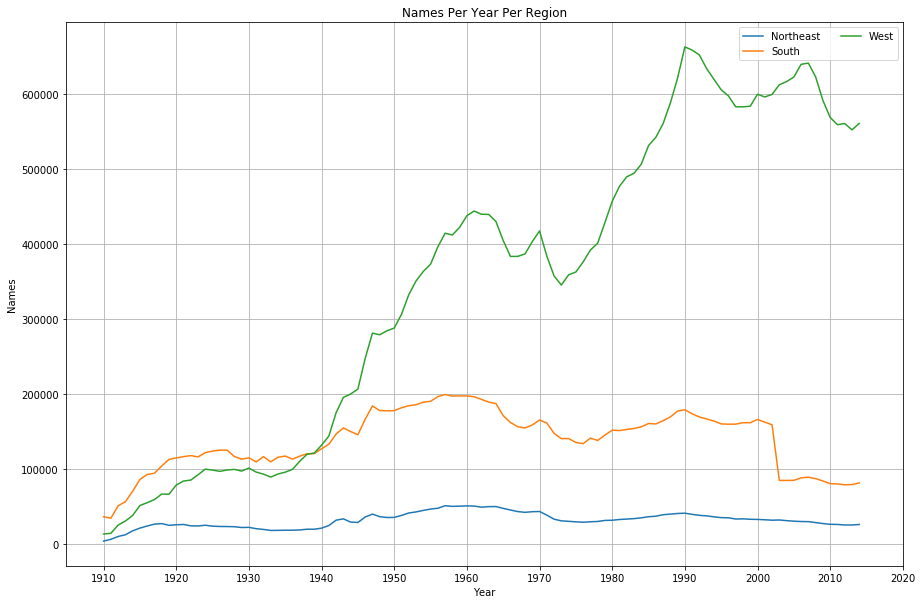

In [50]:
#names per region over time
RegionNameGB = baby_name_new.groupby(['Year', 'Region'])['Count'].sum()
RegionNameGBDF = pd.DataFrame(RegionNameGB)
RegionNameGBDF
RegionNameGBDF.rename(index={0: "Year", 1: "Region", 2: "Count"})
RegionNameGBDFX = RegionNameGBDF.unstack()
RegionNameGBDFX.columns = RegionNameGBDFX.columns.droplevel()
RegionNameGBDFX
multi_plot = RegionNameGBDFX.plot(kind="line", figsize=(15, 10))
multi_plot.set_title("Names Per Year Per Region")
multi_plot.set_xlabel('Year')
multi_plot.set_ylabel('Names')
multi_plot.legend(ncol=2)
years = list(range(1910, 2021, 10))
plt.xticks(years)
plt.grid()
plt.savefig(f'Output/Names Per Year Per Region.png')

In [51]:
#group by Name to find popular names
BabyNameGB = baby_name_original.groupby("Name")
BabyName = BabyNameGB.count().index
NameCount = BabyNameGB["Count"].sum()

TopNameGB = pd.DataFrame({"Name": BabyName, "Popularity": NameCount
                             })
#sort names by popularity
TopName = TopNameGB.sort_values(by=['Popularity'], ascending=False)
TopName.head(10)

,Name,Popularity
Name,,
Michael,Michael,726834.0
James,James,693487.0
Robert,Robert,676076.0
John,John,671498.0
David,David,615056.0
Mary,Mary,522515.0
William,William,516268.0
Richard,Richard,382903.0
Christopher,Christopher,377606.0


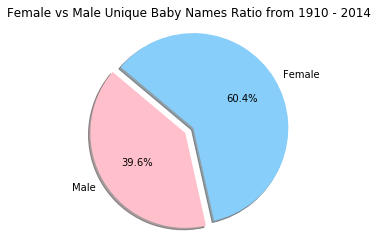

<Figure size 432x288 with 0 Axes>

In [52]:
# The names used by each gender (female has more diverse name selections/options than male)
name= baby_name_original.loc[:,['Name','Gender','Count']]
name

gendername= name.groupby(['Gender']).nunique()['Name']
gendername

Male= 13139
Female=20031

labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [13139, 20031]

# The colors of each section of the pie chart
colors = ["pink","lightskyblue"]

explode = (0,0.1)

plt.pie(sizes, labels=labels,explode=explode, colors=colors, shadow=True, startangle=140,autopct="%1.1f%%")
plt.title(f"Female vs Male Unique Baby Names Ratio from 1910 - 2014")
plt.axis("equal")
plt.show()
# export as png

plt.savefig(f'Output/Female vs Male Unique Baby Names Ratio from 1910 - 2014.png')

In [74]:
# Group the dataset by name
names = baby_name_original.groupby("Name")

# Different names in the database
baby_name_original.Name.nunique()


20652

In [75]:
# Name with the most occurances
most_occurances = names.Count.sum().sort_values(ascending=False)
most_occurances

Name
Michael     726834.0
James       693487.0
Robert      676076.0
John        671498.0
David       615056.0
              ...   
Jayren           5.0
Jayvien          5.0
Jazalyn          5.0
Jaziyah          5.0
Kashmere         5.0
Name: Count, Length: 20652, dtype: float64

In [76]:
# Least occurances
least_occurances = (names.Count.sum()== 5).sum()
least_occurances

2975

In [77]:
# Top 10 Males Name
baby_name_male = baby_name_original[baby_name_original["Gender"] == "M"]
baby_name_male = baby_name_male[["Name", "Count"]]
baby_name_male = baby_name_male.groupby("Name")
baby_name_male = baby_name_male.sum()
baby_name_male = baby_name_male.sort_values("Count", ascending=False)
baby_name_male.head(10)

,Count
Name,
Michael,722651.0
James,690430.0
Robert,673607.0
John,669089.0
David,613046.0
William,514861.0
Richard,381858.0
Christopher,375905.0
Daniel,370072.0


In [78]:
# Top 10 Female Names

baby_name_female = baby_name_original[baby_name_original["Gender"] == "F"]
baby_name_female= baby_name_female[["Name", "Count"]]
baby_name_female = baby_name_female.groupby("Name")
baby_name_female = baby_name_female.sum()
baby_name_female = baby_name_female.sort_values("Count", ascending=False)
baby_name_female.head(10)

,Count
Name,
Mary,521196.0
Jennifer,329904.0
Elizabeth,277458.0
Patricia,257835.0
Jessica,256003.0
Linda,250265.0
Barbara,217539.0
Sarah,201562.0
Ashley,196703.0


In [79]:
# For creating tuples
males = [(male,'M') for male in list(baby_name_male.head(8).index)]
females = [(female,'F') for female in list(baby_name_female.head(8).index)]

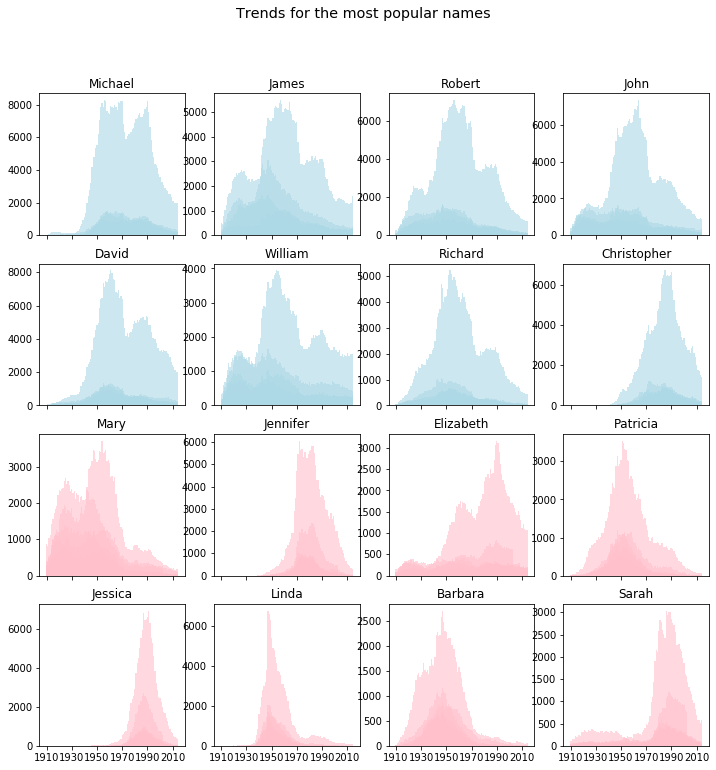

In [97]:
most_popular = baby_name_original

def plot(ax, name, gender):
    data = most_popular.loc[(most_popular.Name==name)&(most_popular.Gender==gender)]
    ax.bar(data.Year, data.Count, width = 1, alpha=0.6,
           color = 'pink' if gender=='F' else 'lightblue')
    ax.set_title(name)
    return ax

fig, ax = plt.subplots(4,4, figsize=(12,12), sharex=True)
ax = ax.flatten()
years = list(range(1910, 2021,20))
plt.xticks(years)
for a, (name, gender) in zip(ax, males+females):
    plot(a, name, gender)
fig.suptitle('Trends for the most popular names',fontsize='x-large');
plt.savefig("Output/Popular_Names.png")

In [82]:
baby_name_original["Name Length"]= baby_name_original["Name"].str.len()
baby_name_original

,Id,Name,Year,Gender,State,Count,Name Length
0,1,Mary,1910,F,AK,14.0,4
1,2,Annie,1910,F,AK,12.0,5
2,3,Anna,1910,F,AK,10.0,4
3,4,Margaret,1910,F,AK,8.0,8
4,5,Helen,1910,F,AK,7.0,5
...,...,...,...,...,...,...,...
1048570,1048571,Kyrsten,2002,F,FL,6.0,7
1048571,1048572,Lacy,2002,F,FL,6.0,4
1048572,1048573,Laurie,2002,F,FL,6.0,6
1048573,1048574,Lee,2002,F,FL,6.0,3


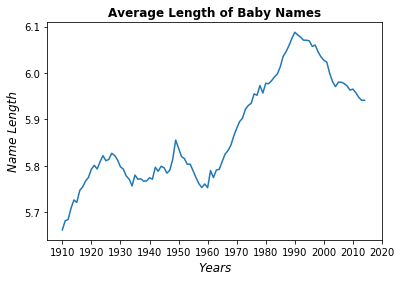

In [84]:
plt.plot(baby_name_original.groupby(['Year']).agg({'Name Length':np.mean}))
years = list(range(1910, 2021,10))
plt.xticks(years)
plt.xlabel("Years",fontsize=12,style='italic')
plt.ylabel("Name Length", fontsize=12,style='italic')
plt.title("Average Length of Baby Names",fontsize=12,fontweight='bold',style='normal')
plt.savefig("Output/NameLength.png")
plt.show()

In [85]:
both_df = baby_name_original.groupby(['Year','Gender'])['Name Length'].mean()
both_df = both_df.unstack()

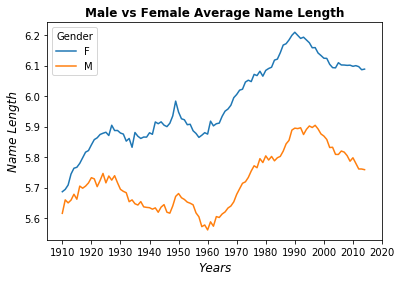

In [86]:
both_df.plot(kind = 'line')
years = list(range(1910, 2021,10))
plt.xticks(years)
plt.xlabel("Years",fontsize=12,style='italic')
plt.ylabel("Name Length",fontsize=12,style='italic')
plt.title("Male vs Female Average Name Length",fontsize=12,fontweight='bold',style='normal')
#plt.savefig("../Output/Male vs Female Name Length.png")
plt.savefig("Output/Male vs Female Name Length.png")
plt.show()

In [88]:
# Most popular Names Length
popular_name_length = baby_name_original.groupby(['Name','Name Length']).size().reset_index(name="Count").sort_values(by="Count",ascending=False).drop_duplicates("Name", keep="first")
print("The most popular Name Lengths:")
popular_name_length.head(20)

The most popular Name Lengths:


,Name,Name Length,Count
12020,Leslie,6,1233
8574,James,5,1217
11863,Lee,3,1208
9517,John,4,1189
13397,Mary,4,1184
16265,Robert,6,1164
9316,Jessie,6,1158
13877,Michael,7,1127
19847,William,7,1108
5955,Elizabeth,9,1073


In [90]:
baby_name_new = baby_name_original.copy()
baby_name_new.set_index('Id', inplace=True)
#baby_name_new["Year"] = baby_name_new["Year"].astype(int)
baby_name_new['Decade'] = ((baby_name_new['Year']//10)*10)
#baby_name_new = baby_name_new.reset_index(drop=True)
baby_name_new

,Name,Year,Gender,State,Count,Name Length,Decade
Id,,,,,,,
1,Mary,1910,F,AK,14.0,4,1910
2,Annie,1910,F,AK,12.0,5,1910
3,Anna,1910,F,AK,10.0,4,1910
4,Margaret,1910,F,AK,8.0,8,1910
5,Helen,1910,F,AK,7.0,5,1910
...,...,...,...,...,...,...,...
1048571,Kyrsten,2002,F,FL,6.0,7,2000
1048572,Lacy,2002,F,FL,6.0,4,2000
1048573,Laurie,2002,F,FL,6.0,6,2000


In [91]:
# Group the dataset by decade
decade = baby_name_new.groupby("Decade")

In [92]:
# Average per Decade 
average_decade = decade['Name Length'].mean()
print("The Average per decade is:")
average_decade

The Average per decade is:


Decade
1910    5.732300
1920    5.810657
1930    5.775487
1940    5.798417
1950    5.789889
1960    5.807671
1970    5.930810
1980    6.017974
1990    6.065289
2000    5.987623
2010    5.950541
Name: Name Length, dtype: float64

In [93]:
# Standard deviation of decade
std_decade= decade['Name Length'].std()
print("The Standard Deviation of decade on Name length is:")
std_decade

The Standard Deviation of decade on Name length is:


Decade
1910    1.459526
1920    1.467503
1930    1.462345
1940    1.472677
1950    1.462622
1960    1.452873
1970    1.435261
1980    1.458566
1990    1.439460
2000    1.402543
2010    1.395767
Name: Name Length, dtype: float64

In [94]:
# The average Name Length for 100 years
gender_name_length = baby_name_original["Name Length"]
average_name = np.average(gender_name_length)
print(" The average name length is:" + str(average_name))

 The average name length is:5.917804639629974


In [95]:
mean_series = baby_name_new.groupby(['Year'])['Name Length'].mean()
max_index = mean_series.argmax()
print("Maximum average value is %f"%mean_series.iloc[max_index])

# Year with maximum average length
print("Year with maximum length is %d"%mean_series.index[max_index])

#Top ten values in 1990
baby_name_new[baby_name_new['Year'] == 1990]

Maximum average value is 6.087786
Year with maximum length is 1990


,Name,Year,Gender,State,Count,Name Length,Decade
Id,,,,,,,
8496,Jessica,1990,F,AK,112.0,7,1990
8497,Ashley,1990,F,AK,96.0,6,1990
8498,Amanda,1990,F,AK,92.0,6,1990
8499,Brittany,1990,F,AK,75.0,8,1990
8500,Samantha,1990,F,AK,72.0,8,1990
...,...,...,...,...,...,...,...
1027303,Wilda,1990,F,FL,5.0,5,1990
1027304,Wilma,1990,F,FL,5.0,5,1990
1027305,Yajaira,1990,F,FL,5.0,7,1990


In [96]:
print("The Longest Name Length for year 1990 :")
baby_name_new[baby_name_new['Year'] == 1990].sort_values('Name Length',ascending = False).head(10)[['Name','Name Length']]



The Longest Name Length for year 1990 :


,Name,Name Length
Id,,
644768,Antoniodejesus,14
644729,Michaelanthony,14
470124,Mariaguadalupe,14
470123,Mariadelcarmen,14
472149,Mariacristina,13
644235,Michaelangelo,13
472164,Maryelizabeth,13
645058,Victoralfonso,13
471317,Kristinamarie,13


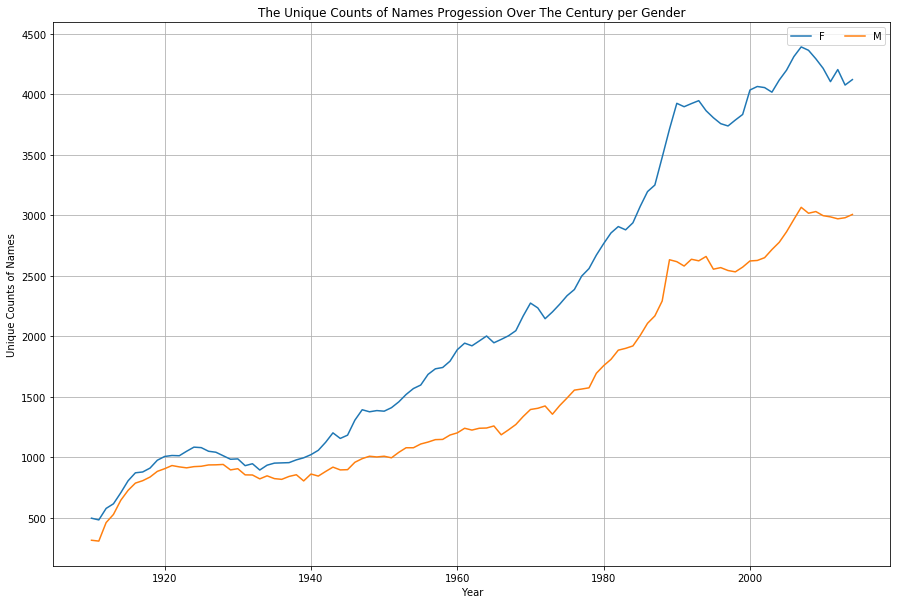

In [66]:
#The progression of numbers of unique names in each year


year= baby_name_original.loc[:,['Name','Year','Gender']]
year

# getting female list of unique name by each year

genderf= year.loc[year['Gender'] == 'F']
genderf

genderfemale= genderf.groupby(['Year','Gender']).nunique()['Name']


genderfemale= pd.DataFrame(genderfemale)
genderfemale

#getting male list of unique name by each year

genderm= year.loc[year['Gender'] == 'M']
genderm

gendermale= genderm.groupby(['Year','Gender']).nunique()['Name']

gendermale= pd.DataFrame(gendermale)
gendermale


final=pd.merge(genderfemale, gendermale, how='outer', on=['Year','Gender','Name'])
final

final.rename(index={0: "Year", 1: "Gender", 2: "Name"})
df = final.unstack()
df.columns =df.columns.droplevel()
df

multi_plot = df.plot(kind="line", figsize=(15, 10))
multi_plot.set_title("The Unique Counts of Names Progession Over The Century per Gender")
multi_plot.set_xlabel("Year")

multi_plot.set_ylabel("Unique Counts of Names")
multi_plot.legend(ncol=2)


years = list(range(1910, 2021, 10))

#plt.set_xticks(years)
plt.grid()


plt.savefig(f'Output/The Unique Counts of Names Progession Over The Century per Gender.png')

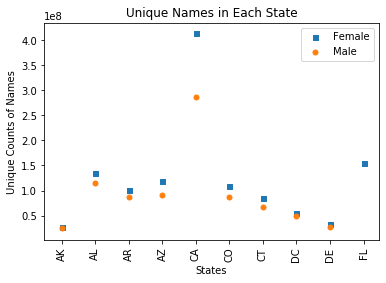

<Figure size 432x288 with 0 Axes>

In [68]:
# The progression of numbers of unique names by state in gender

region= baby_name_original.loc[:,['Name','Year','Gender','State']]
region



f= region.loc[region['Gender'] == 'F']
f

m= region.loc[region['Gender'] == 'M']
m


fgender= f.groupby(['State']).sum()
fgender = pd.DataFrame(fgender)
fgender

mgender=m.groupby(['State']).sum()
mgender= pd.DataFrame(mgender)
mgender

data=pd.merge(fgender, mgender, how='left', on=['State'], suffixes=('_F', '_M'))
data

f= data['Year_F']
m =data['Year_M']


x = data.index
y1 = f
y2= m
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(x, y1, s=25, marker="s", label='Female')
ax1.scatter(x, y2, s=25, marker="o", label='Male')


plt.title("Unique Names in Each State")
plt.xlabel("States")
plt.ylabel("Unique Counts of Names")
plt.xticks(rotation=90)

plt.legend(loc='upper right');
plt.show()
plt.savefig(f'Output/The Counts of Unique Name In Different States per Gender.png')